# Custom CNN for GTSRB Traffic Sign Detection

### Install Libraries

In [ ]:
pip install pillow tqdm pandas torch torchvision matplotlib scikit-learn torchsummary

### Download and prepare all dataset

In [1]:
#### Download `GTSRB_Final_Training_Images` Dataset and Unzip

!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
!unzip -q -o GTSRB_Final_Training_Images.zip -d data/

#### Change images to `png`

from PIL import Image
import glob
import os
from tqdm import tqdm

for img in tqdm(glob.glob("data/GTSRB/Final_Training/Images/*/*.ppm")):
    im = Image.open(img)
    fname = img.strip(".ppm") + ".png"
    im.save(fname)

#### Remove .ppm files

for img in tqdm(glob.glob("data/GTSRB/Final_Training/Images/*/*.ppm")):
    os.remove(img)

#### Rename filenames in csv file

# Using Stream EDitor (sed)
# - https://www.cyberciti.biz/faq/how-to-use-sed-to-find-and-replace-text-in-files-in-linux-unix-shell/

!sed -i 's/\.ppm/.png/g' data/GTSRB/Final_Training/Images/*/*.csv | echo Done

## Test
# ---

#### Download `GTSRB_Final_Test_Images` Dataset and Unzip

!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
!unzip -q -o GTSRB_Final_Test_Images.zip -d data/

#### Change images to `png`

for img in tqdm(glob.glob("data/GTSRB/Final_Test/Images/*.ppm")):
    im = Image.open(img)
    fname = img.strip(".ppm") + ".png"
    im.save(fname)

#### Remove .ppm files

for img in tqdm(glob.glob("data/GTSRB/Final_Test/Images/*.ppm")):
    os.remove(img)

#### Rename filenames in csv file

# Using Stream EDitor (sed)
# - https://www.cyberciti.biz/faq/how-to-use-sed-to-find-and-replace-text-in-files-in-linux-unix-shell/

!sed -i 's/\.ppm/.png/g' data/GTSRB/Final_Test/Images/*.csv | echo Done

## Test Ground Truth
# ---
# only required if we need to test predictions with their ground truth

#### Download `GTSRB_Final_Test_GT` Dataset and Unzip

!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
!unzip -q -o GTSRB_Final_Test_GT.zip -d data/GTSRB/Final_Test/

#### Rename filenames in csv file

!sed -i 's/\.ppm/.png/g' data/GTSRB/Final_Test/*.csv | echo Done

--2024-05-14 12:10:23--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M   904KB/s    in 5m 6s   

2024-05-14 12:15:30 (882 KB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



100%|████████████████████████████████████████████████| 39209/39209 [00:00<00:00, 77279.42it/s]

Done


--2024-05-14 12:15:57--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.86M  1.02MB/s    in 85s     

2024-05-14 12:17:22 (1020 KB/s) - ‘GTSRB_Final_Test_Images.zip’ saved [88978620/88978620]



100%|████████████████████████████████████████████████| 12630/12630 [00:00<00:00, 92779.71it/s]

Done


--2024-05-14 12:17:31--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K   282KB/s    in 0.3s    

2024-05-14 12:17:32 (282 KB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]

Done


### Reading CSV files

In [2]:
import pandas as pd
import glob
import os

# Path to the directory containing the CSV files
path = './data/GTSRB/Final_Training/Images'

# Get a list of all CSV files in the directory
all_files = glob.glob(path + "/*/*.csv")

# Create an empty list to store the dataframes
flist = []

# def read_and_modify_csv(all_files):
newdf = pd.DataFrame()
for filename in all_files:
    parent_dir = os.path.basename(os.path.dirname(filename))
    # print(parent_dir)
    df = pd.read_csv(filename, delimiter=';')

    tempdf = df.copy()
    # Modify the first column
    tempdf.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: f'{parent_dir}/{x}')

    newdf = pd.concat([newdf, tempdf])
newdf.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00042/00000_00000.png,27,28,5,6,22,23,42
1,00042/00000_00001.png,29,27,6,5,23,22,42
2,00042/00000_00002.png,29,29,6,6,24,24,42
3,00042/00000_00003.png,28,29,5,6,23,24,42
4,00042/00000_00004.png,31,29,5,5,25,24,42


In [3]:
newdf.to_csv(f'{path}/train_annotations.csv', index=False)

In [4]:
annot_df = pd.read_csv('./data/GTSRB/Final_Training/Images/train_annotations.csv')

In [5]:
annot_df.head(5002)

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00042/00000_00000.png,27,28,5,6,22,23,42
1,00042/00000_00001.png,29,27,6,5,23,22,42
2,00042/00000_00002.png,29,29,6,6,24,24,42
3,00042/00000_00003.png,28,29,5,6,23,24,42
4,00042/00000_00004.png,31,29,5,5,25,24,42
...,...,...,...,...,...,...,...,...
4997,00009/00037_00017.png,48,49,5,6,43,44,9
4998,00009/00037_00018.png,52,51,6,6,46,46,9
4999,00009/00037_00019.png,55,53,6,5,49,48,9
5000,00009/00037_00020.png,58,58,5,5,53,53,9


In [6]:
# annot_df['ClassId'].value_counts(sort=True)

In [7]:
test_annotations = './data/GTSRB/Final_Test/GT-final_test.csv'

test_df = pd.read_csv(test_annotations, delimiter=';')
test_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.png,53,54,6,5,48,49,16
1,00001.png,42,45,5,5,36,40,1
2,00002.png,48,52,6,6,43,47,38
3,00003.png,27,29,5,5,22,24,33
4,00004.png,60,57,5,5,55,52,11


In [8]:
test_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [9]:
# test_df['ClassId'].value_counts(sort=True)

#### Import Libraries

In [2]:
import numpy as np
from PIL import Image
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.io import read_image
from sklearn.model_selection import train_test_split
from torchsummary import summary

### Dataset Processing
#### Dataset Class

In [6]:
# creating object for our image dataset
class GTSRBdataset(Dataset):

    def __init__(self, annotations, directory, transform=None):
        # directory containing the images
        self.directory = directory
        # loading the csv with info about images
        self.labels = annotations
        # transform to be applied on images
        self.transform = transform

        # Number of images in dataset
        self.len = self.labels.shape[0]

    # getting the length
    def __len__(self):
        return len(self.labels)

    # getting the data items
    def __getitem__(self, idx):
        # defining the image path
        image_path = os.path.join(self.directory, self.labels.iloc[idx, 0])
        
#         Filename 	Width 	Height 	Roi.X1 	Roi.Y1 	Roi.X2 	Roi.Y2 	ClassId
        image = Image.open(image_path)
        
        # corresponding class labels of the images 
#         bbox = tuple(self.labels.iloc[idx, [3,4,5,6]])
        img_width = self.labels.iloc[idx, 1]
        img_height = self.labels.iloc[idx, 2]
        x1 = self.labels.iloc[idx, 3]
        y1 = self.labels.iloc[idx, 4]
        x2 = self.labels.iloc[idx, 5]
        y2 = self.labels.iloc[idx, 6]
        
        x1 = x1/img_width
        y1 = y1/img_height
        x2 = x2/img_width
        y2 = y2/img_height
        
        bbox = (x1, y1, x2, y2)
        classid = self.labels.iloc[idx, 7]

        # apply the transform if not set to None
        if self.transform:
            image = self.transform(image)
        
        # returning the image and label
        return image, torch.tensor(bbox, dtype=torch.float32), torch.tensor(classid)                              ##### added bbox

#### Split Dataset

In [7]:
train_transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()]) 

train_directory = './data/GTSRB/Final_Training/Images'
train_annotations = "train_annotations.csv"

train_df = pd.read_csv(os.path.join(train_directory, train_annotations))

train_df, valid_df = train_test_split(train_df, test_size=0.2, shuffle=True)

train_dataset = GTSRBdataset(annotations=train_df,
                            directory=train_directory, 
                            transform = train_transform)

valid_dataset = GTSRBdataset(annotations=valid_df,
                            directory=train_directory,
                            transform = train_transform)



In [8]:
test_directory = './data/GTSRB/Final_Test/Images'
test_annotations = './data/GTSRB/Final_Test/GT-final_test.csv'

test_df = pd.read_csv(test_annotations, delimiter=';')
test_dataset = GTSRBdataset(annotations=test_df,
                            directory=test_directory,
                            transform = train_transform)
test_df.head()
# Filename 	Width 	Height 	Roi.X1 	Roi.Y1 	Roi.X2 	Roi.Y2 	ClassId

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000.png,53,54,6,5,48,49,16
1,00001.png,42,45,5,5,36,40,1
2,00002.png,48,52,6,6,43,47,38
3,00003.png,27,29,5,5,22,24,33
4,00004.png,60,57,5,5,55,52,11


#### Data Loaders

In [9]:
train_batch_size = 100
num_classes = 43   # 43 class of traffic sign

# Create a DataLoader from the dataset for training
train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

# Create a DataLoader from the dataset for validation
valid_dataloader = DataLoader(valid_dataset, batch_size=train_batch_size, shuffle=True)

# Create a DataLoader from the dataset for validation
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

### Data visualisation

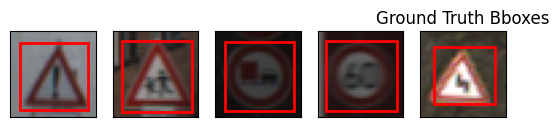

In [10]:
import matplotlib.patches as patches

# random sample from the DataLoader
for batch_idx, sample in enumerate(train_dataloader):
    
    fig, axs = plt.subplots(nrows=1, ncols=5)

    for i in range(5):
        image_tensor = sample[0][i]
        bboxes = sample[1][i]
        labels = sample[2][i]

        x1, y1, x2, y2 = bboxes
        x1 = x1*32
        y1 = y1*32
        x2 = x2*32
        y2 = y2*32
        width = x2 - x1
        height = y2 - y1
        bbox_patch = patches.Rectangle((x1, y1), width, height, edgecolor='red', linewidth=2, fill=False)
        axs[i].add_patch(bbox_patch)
        numpy_img = image_tensor.numpy()
        img_reshaped = np.moveaxis(numpy_img, 0, 2)
        axs[i].imshow(img_reshaped)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    
    plt.title("Ground Truth Bboxes")
    plt.plot()
    break

#### Model Architecture

In [11]:
class DetectNet(nn.Module):
    def __init__(self, num_classes):
        super(DetectNet, self).__init__()

        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0)

        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0)

        # First fully connected layer
        self.fc1 = nn.Linear(128*2*2, 128)

        # Second fully connected layer
        self.fc2 = nn.Linear(128, 64)
        
        # FC for bbox
        self.fcbx1 = nn.Linear(64, 32)
        self.fcbx2 = nn.Linear(32, 4)
        
        # Output layer with 43 neurons 
        self.fcc = nn.Linear(64, num_classes)
        

    def forward(self, x):
        # First convolutional layer
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        # Second convolutional layer
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Third convolutional layer
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Flatten the output from the convolutional layers
        x = torch.flatten(x, 1)

        # First fully connected layer
        x = F.relu(self.fc1(x))

        # Second fully connected layer
        x = F.relu(self.fc2(x))
        
        bbox = F.relu(self.fcbx1(x))
        bbox = F.relu(self.fcbx2(bbox))

        # Apply sigmoid activation function to the output layer
        class_id = self.fcc(x)

        return (bbox), class_id

In [12]:
# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model
model = DetectNet(num_classes)

model.to(device)

# Print the model summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
            Conv2d-2           [-1, 64, 13, 13]          18,496
            Conv2d-3            [-1, 128, 4, 4]          73,856
            Linear-4                  [-1, 128]          65,664
            Linear-5                   [-1, 64]           8,256
            Linear-6                   [-1, 32]           2,080
            Linear-7                    [-1, 4]             132
            Linear-8                   [-1, 43]           2,795
Total params: 172,175
Trainable params: 172,175
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.32
Params size (MB): 0.66
Estimated Total Size (MB): 0.99
----------------------------------------------------------------


### Model Training

In [28]:
# Define the loss functions, and optimizer
bbox_loss_fn = nn.MSELoss()
class_loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the training loop
num_epochs = 50

train_bbox_loss = []
train_class_loss = []

valid_bbox_loss = []
valid_class_loss = []

for epoch in range(num_epochs):
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    running_train_bbox_loss = 0.0
    running_train_class_loss = 0.0
    
    running_valid_bbox_loss = 0.0
    running_valid_class_loss = 0.0
    
    for inputs, gt_bboxes, gt_classes in tqdm(train_dataloader):
#         print(inputs.dtype)
#         print(gt_bboxes.dtype)
#         print(gt_classes.dtype)
        
        inputs = inputs.to(device)
        gt_bboxes = gt_bboxes.to(device)
        gt_classes =   gt_classes.to(device)
        
        model.train()  #================train==============
        
        # Forward pass
        bboxes, classes = model(inputs)
        
        # Calculate the loss for the bounding box coordinates
        bbox_loss = bbox_loss_fn(bboxes, gt_bboxes)
        
        # Calculate the loss for the class label
        class_loss = class_loss_fn(classes, gt_classes)
        
        # Backward pass and optimization
        optimizer.zero_grad()

        totalLoss = (1.0 * bbox_loss) + (1.0 * class_loss)
        totalLoss.backward()
        optimizer.step()
        
        # Update the running loss
        running_train_bbox_loss += bbox_loss.item()
        running_train_class_loss += class_loss.item()
        
    # Print the average loss for the epoch training
    epoch_train_bbox_loss = running_train_bbox_loss / len(train_dataloader)
    epoch_train_class_loss = running_train_class_loss / len(train_dataloader)
    
    train_bbox_loss.append(epoch_train_bbox_loss)
    train_class_loss.append(epoch_train_class_loss)
    
    print(f"{'Training':<{12}}: BBox_Loss = {epoch_train_bbox_loss:.4f} Class_Loss = {epoch_train_class_loss:.4f}")
    
    for inputs, gt_bboxes, gt_classes in tqdm(valid_dataloader):
        inputs = inputs.to(device)
        gt_bboxes = gt_bboxes.to(device)
        gt_classes =   gt_classes.to(device)
        
        model.eval() ### validation mode
        # Calculate the validation loss
        with torch.no_grad():
            bboxes, classes = model(inputs)
            bbox_loss = bbox_loss_fn(bboxes, gt_bboxes)
            class_loss = class_loss_fn(classes, gt_classes)
        
        # Update the validation loss
        running_valid_bbox_loss += bbox_loss.item()
        running_valid_class_loss += class_loss.item()
    
    # Print the average loss for the epoch validation
    epoch_valid_bbox_loss = running_valid_bbox_loss / len(valid_dataloader)
    epoch_valid_class_loss = running_valid_class_loss / len(valid_dataloader)
    
    valid_bbox_loss.append(epoch_valid_bbox_loss)
    valid_class_loss.append(epoch_valid_class_loss)
    
    print(f"{'Validation':<{12}}: BBox_Loss = {epoch_valid_bbox_loss:.4f} Class_Loss = {epoch_valid_class_loss:.4f}")
    print()

Epoch 1/50


100%|███████████████████████████████████████████████████████| 314/314 [00:25<00:00, 12.51it/s]


Training    : BBox_Loss = 0.0055 Class_Loss = 0.1617


100%|█████████████████████████████████████████████████████████| 79/79 [00:05<00:00, 15.54it/s]


Validation  : BBox_Loss = 0.0089 Class_Loss = 0.1666

Epoch 2/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.60it/s]


Training    : BBox_Loss = 0.0041 Class_Loss = 0.1145


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.89it/s]


Validation  : BBox_Loss = 0.0032 Class_Loss = 0.1167

Epoch 3/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.80it/s]


Training    : BBox_Loss = 0.0029 Class_Loss = 0.0855


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]


Validation  : BBox_Loss = 0.0027 Class_Loss = 0.1063

Epoch 4/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.49it/s]


Training    : BBox_Loss = 0.0023 Class_Loss = 0.0665


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.96it/s]


Validation  : BBox_Loss = 0.0022 Class_Loss = 0.1279

Epoch 5/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.50it/s]


Training    : BBox_Loss = 0.0018 Class_Loss = 0.0502


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.83it/s]


Validation  : BBox_Loss = 0.0018 Class_Loss = 0.0897

Epoch 6/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.72it/s]


Training    : BBox_Loss = 0.0014 Class_Loss = 0.0370


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.39it/s]


Validation  : BBox_Loss = 0.0012 Class_Loss = 0.0722

Epoch 7/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.44it/s]


Training    : BBox_Loss = 0.0012 Class_Loss = 0.0309


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.55it/s]


Validation  : BBox_Loss = 0.0013 Class_Loss = 0.0824

Epoch 8/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.61it/s]


Training    : BBox_Loss = 0.0011 Class_Loss = 0.0309


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.95it/s]


Validation  : BBox_Loss = 0.0012 Class_Loss = 0.0991

Epoch 9/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.47it/s]


Training    : BBox_Loss = 0.0010 Class_Loss = 0.0290


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.00it/s]


Validation  : BBox_Loss = 0.0012 Class_Loss = 0.0720

Epoch 10/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.71it/s]


Training    : BBox_Loss = 0.0010 Class_Loss = 0.0234


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.02it/s]


Validation  : BBox_Loss = 0.0010 Class_Loss = 0.0739

Epoch 11/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.44it/s]


Training    : BBox_Loss = 0.0009 Class_Loss = 0.0203


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.15it/s]


Validation  : BBox_Loss = 0.0010 Class_Loss = 0.0605

Epoch 12/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.62it/s]


Training    : BBox_Loss = 0.0009 Class_Loss = 0.0203


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.65it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0654

Epoch 13/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.43it/s]


Training    : BBox_Loss = 0.0009 Class_Loss = 0.0193


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.67it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0797

Epoch 14/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 14.19it/s]


Training    : BBox_Loss = 0.0009 Class_Loss = 0.0176


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.59it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0610

Epoch 15/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.52it/s]


Training    : BBox_Loss = 0.0009 Class_Loss = 0.0132


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.80it/s]


Validation  : BBox_Loss = 0.0009 Class_Loss = 0.0687

Epoch 16/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.49it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0191


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.96it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0742

Epoch 17/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.74it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0078


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.90it/s]


Validation  : BBox_Loss = 0.0009 Class_Loss = 0.0540

Epoch 18/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 14.26it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0136


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.96it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.1587

Epoch 19/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.70it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0204


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.95it/s]


Validation  : BBox_Loss = 0.0009 Class_Loss = 0.0635

Epoch 20/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.73it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0079


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.04it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0695

Epoch 21/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.67it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0040


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.77it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0512

Epoch 22/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.77it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0120


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.11it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.1023

Epoch 23/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 14.19it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0179


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.07it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0596

Epoch 24/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.70it/s]


Training    : BBox_Loss = 0.0008 Class_Loss = 0.0150


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.91it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0529

Epoch 25/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.61it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0038


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.00it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0633

Epoch 26/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.78it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0057


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.86it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0742

Epoch 27/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.54it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0136


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.94it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0757

Epoch 28/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.69it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0090


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.96it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0702

Epoch 29/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 13.84it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0082


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.58it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0647

Epoch 30/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.41it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0134


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.56it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0606

Epoch 31/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.50it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0050


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.47it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0674

Epoch 32/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.63it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0118


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.12it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.1168

Epoch 33/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.61it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0064


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.91it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0610

Epoch 34/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.58it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0053


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.79it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0624

Epoch 35/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.58it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0116


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.90it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0702

Epoch 36/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 13.98it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0070


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.79it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0550

Epoch 37/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.62it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0044


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.63it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0542

Epoch 38/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.44it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0008


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.74it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0691

Epoch 39/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.38it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0123


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.60it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0762

Epoch 40/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.72it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0156


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.97it/s]


Validation  : BBox_Loss = 0.0008 Class_Loss = 0.0729

Epoch 41/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.58it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0087


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.88it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0518

Epoch 42/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.59it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0015


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.85it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0603

Epoch 43/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.55it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0081


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.64it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0753

Epoch 44/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.41it/s]


Training    : BBox_Loss = 0.0007 Class_Loss = 0.0037


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.57it/s]


Validation  : BBox_Loss = 0.0007 Class_Loss = 0.0605

Epoch 45/50


100%|███████████████████████████████████████████████████████| 314/314 [00:22<00:00, 13.67it/s]


Training    : BBox_Loss = 0.0006 Class_Loss = 0.0004


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.94it/s]


Validation  : BBox_Loss = 0.0006 Class_Loss = 0.0571

Epoch 46/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.63it/s]


Training    : BBox_Loss = 0.0006 Class_Loss = 0.0001


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.11it/s]


Validation  : BBox_Loss = 0.0006 Class_Loss = 0.0550

Epoch 47/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.67it/s]


Training    : BBox_Loss = 0.0006 Class_Loss = 0.0000


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.09it/s]


Validation  : BBox_Loss = 0.0006 Class_Loss = 0.0559

Epoch 48/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.77it/s]


Training    : BBox_Loss = 0.0006 Class_Loss = 0.0000


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 18.94it/s]


Validation  : BBox_Loss = 0.0006 Class_Loss = 0.0575

Epoch 49/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.79it/s]


Training    : BBox_Loss = 0.0005 Class_Loss = 0.0000


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.25it/s]


Validation  : BBox_Loss = 0.0006 Class_Loss = 0.0580

Epoch 50/50


100%|███████████████████████████████████████████████████████| 314/314 [00:21<00:00, 14.66it/s]


Training    : BBox_Loss = 0.0005 Class_Loss = 0.0000


100%|█████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 19.02it/s]

Validation  : BBox_Loss = 0.0005 Class_Loss = 0.0605



### Loss Visualisation

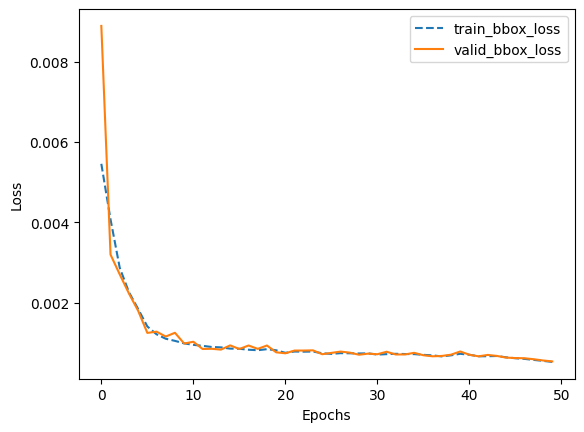

In [56]:
epoch_list = [i for i in range(num_epochs)]
plt.plot(epoch_list,train_bbox_loss, linestyle="--", label="train_bbox_loss")
plt.plot(epoch_list,valid_bbox_loss,label="valid_bbox_loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

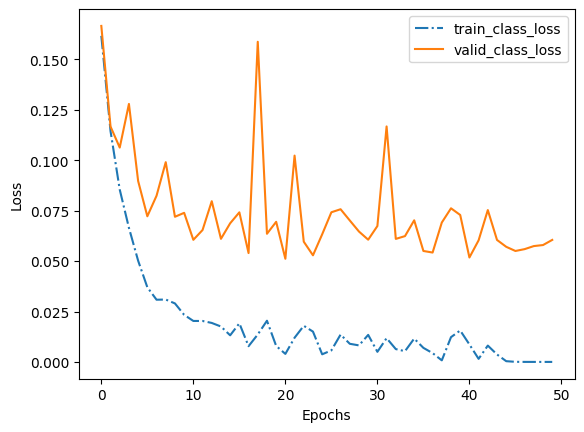

In [55]:
epoch_list = [i for i in range(num_epochs)]
plt.plot(epoch_list,train_class_loss, linestyle="-.", label="train_class_loss")
plt.plot(epoch_list,valid_class_loss, label="valid_class_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
import os
os.makedirs('./out/', exist_ok=True)

# Save the model to a file
torch.save(model, './out/model_may14e50.pt')

### Testing

In [32]:
# load saved model
model = torch.load('./out/model_may14e50.pt')

In [33]:
tp = 0
n_test_samples = 500
test_iter = iter(test_dataloader)

for i in tqdm(range(n_test_samples)):
    inputs, gt_bboxes, gt_class = next(test_iter) 

    inputs = inputs.to(device)
    gt_bboxes = gt_bboxes.to(device)
    gt_classes =   gt_classes.to(device)

    model.eval() #================== prediction mode
    with torch.no_grad():
        bboxes, classes = model(inputs)
        
        pred_class = torch.argmax(classes.view(-1))
        gt_class = gt_class.item()
        
        if pred_class == gt_class:
            tp += 1
        
print(f"Predicted correctly {tp} out of {n_test_samples}")

100%|██████████████████████████████████████████████████████| 500/500 [00:00<00:00, 815.97it/s]

Predicted correctly 471 out of 500


In [34]:
len(test_dataloader)

12630

In [59]:
tp = 0
n_test_samples = len(test_dataloader)

for inputs, gt_bboxes, gt_classes in tqdm(test_dataloader): 

    inputs = inputs.to(device)
    gt_bboxes = gt_bboxes.to(device)
    gt_classes =   gt_classes.to(device)

    model.eval()
    with torch.no_grad():
        bboxes, classes = model(inputs)
        
        pred_class = torch.argmax(classes.view(-1))
        gt_class = gt_classes.item()
        
        if pred_class == gt_class:
            tp += 1
        
print(f"Predicted correctly {tp} out of {n_test_samples} for classification ({(tp/n_test_samples) * 100:.2f}%)")

100%|██████████████████████████████████████████████████| 12630/12630 [00:13<00:00, 909.90it/s]

Predicted correctly 11935 out of 12630 for classification (94.50%)


### Prediction Visualization

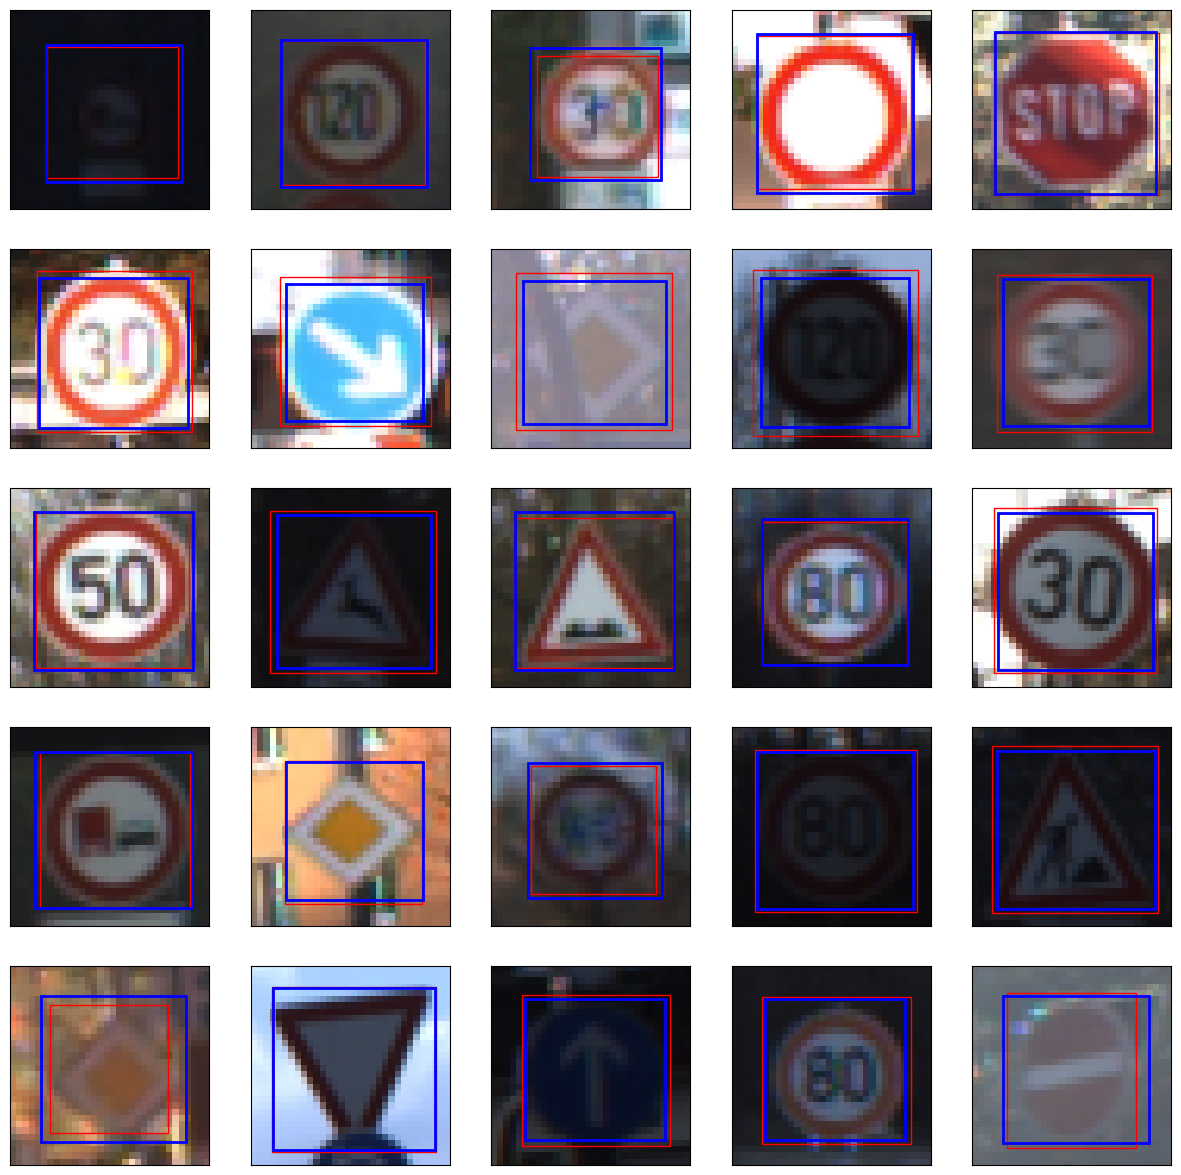

In [61]:
# show gt and bbox

test_iter = iter(test_dataloader)

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i in range(5):
    for j in range(5):
    
        inputs, gt_bboxes, gt_class = next(test_iter)

        inputs = inputs.to(device)
        gt_bboxes = gt_bboxes.to(device)
        gt_classes =   gt_classes.to(device)

        model.eval()

        with torch.no_grad():
            bboxes, classes = model(inputs)

            pred_class = torch.argmax(classes.view(-1))
            gt_class = gt_class.item()

            gt_x1, gt_y1, gt_x2, gt_y2 = gt_bboxes[0, 0].item(), gt_bboxes[0, 1].item(), gt_bboxes[0, 2].item(), gt_bboxes[0, 3].item()
            gt_x1 = gt_x1*32
            gt_y1 = gt_y1*32
            gt_x2 = gt_x2*32
            gt_y2 = gt_y2*32
            gt_width = gt_x2 - gt_x1
            gt_height = gt_y2 - gt_y1
            gt_patch = patches.Rectangle((gt_x1, gt_y1), gt_width, gt_height, edgecolor='red', linewidth=1, fill=False)
            
            x1, y1, x2, y2 = bboxes[0, 0].item(), bboxes[0, 1].item(), bboxes[0, 2].item(), bboxes[0, 3].item()
            x1 = x1*32
            y1 = y1*32
            x2 = x2*32
            y2 = y2*32
            width = x2 - x1
            height = y2 - y1
            bbox_patch = patches.Rectangle((x1, y1), width, height, edgecolor='blue', linewidth=2, fill=False)
            
            axs[i, j].add_patch(gt_patch)
            axs[i, j].add_patch(bbox_patch)
            numpy_img = inputs.detach().cpu().numpy()
            img_reshaped = np.transpose(numpy_img, (2, 3, 1, 0))
            reshaped_image_data = np.squeeze(img_reshaped, axis=3)
            
            axs[i, j].imshow(reshaped_image_data)
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
                      
plt.plot();
# red -> ground_truth
# blue -> predicted